In [5]:
import sys
import os
# Add the 'scripts/' directory to the system path
sys.path.append(os.path.abspath('../triple_mbhb')) 

In [6]:
import Trip_utils as util
import numpy as np
import Triple_dynamics as Tr
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import merger_rate_calculate as mr
import scipy as sp

In [7]:
import scienceplots
plt.style.use(['science']) 
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

In [8]:
Nruns=100
strong_tr, weak_tr, iso_bin, stalled_objs=util.import_objects(Nruns)

Total number of MBH systems is 9234
Number of iso binaries is 7205 and it is 78.03 %
Number of weak triples is 1509 and it is 16.34 %
Number of strong triples is 520 and it is 5.63 %
------------------
Average prompt merger is 111.37 which is 21.42 %
Average merger after ejection is 248.04 which is 47.70 %
There are 160.59 no mergers on average which is 30.88%
Average total mergers is 359.40999999999997 which is 69.12 %
----------------------
Without triple interactions 210(40.4)% strong triple inner binary merges with just inspiral
With triple interactions added 359.4(69.1)% strong triple system has mergers which is a 28.7 % increase in mergers
208.5 (40.1%) strong triple induced mergers are otherwise non mergers under binary inspiral evolution.


## Merger rates

In [9]:
mr.print_all_merger_rates(iso_bin,weak_tr,strong_tr,stalled_objs,Nruns)        

Calculating Merger Rates:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating Merger Rates: 100%|██████████| 100/100 [00:05<00:00, 18.61it/s]


------------------------------
Merger rate considering only isolated binaries is 0.132 yr^-1
Merger rate of weak triples is 0.0079 yr^-1
Total strong triple merger rate is : 0.0096 yr^-1
Total merger rate including strong and weak triples is 0.149 yr^-1
The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly 0.0065 yr^-1
------------------------------
Merger rate considering only isolated binaries is 0.366 yr^-1
Merger rate of weak triples is 0.017 yr^-1
Total strong triple merger rate is : 0.023 yr^-1
Total merger rate including strong and weak triples is 0.407 yr^-1
The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly 0.0158 yr^-1
------------------------------
The total number of mergers in the population is 4621 out of 9234
50.0 % mergers in fiducial (iso+triples) model
42.0 % mergers in isolated binary evolution
48.4 % mergers in inspiral evolution
-------------------

Calculating Merger Rates: 100%|██████████| 100/100 [00:09<00:00, 10.30it/s]

The total merger rate in the stalled model is 0.032 yr^-1
The total merger rate in the fiducial (isolated binary+triple) model is 0.15 yr^-1
The merger rate is suppressed by a factor of 4.6.


In [6]:
merger_rates = [
   obj.total_merger_rate("all", zbinsize=0.1, zmax=7) for obj in tqdm(strong_tr, desc="Calculating Merger Rates")
]
strong_triple_merger_rate,strong_triple_cum_merger_rate = np.mean(merger_rates,axis=0)

iso_bin_merger_rate,iso_bin_cum_merger_rate = iso_bin.total_merger_rate(zbinsize=0.1, zmax=7)
weak_triples_merger_rate,weak_triples_cum_merger_rate = weak_tr.total_merger_rate(zbinsize=0.1, zmax=7)

Calculating Merger Rates: 100%|██████████| 100/100 [00:05<00:00, 19.45it/s]


In [7]:
total_merger_rate = strong_triple_merger_rate+iso_bin_merger_rate+weak_triples_merger_rate

print(f"Merger rate considering only isolated binaries is {iso_bin_merger_rate:.3f} yr^-1")
print(f"Merger rate of weak triples is {weak_triples_merger_rate:.4f} yr^-1")
print(f"Total strong triple merger rate is : {strong_triple_merger_rate:.4f} yr^{-1}")
#print(f"Merger rate increases from {iso_bin_merger_rate:.2f} to {iso_bin_merger_rate+strong_triple_merger_rate:.2f} which is {strong_triple_merger_rate/iso_bin_merger_rate * 100:.1f} % increase when we add strong triples ")
#print(f"After adding both strong and weak triples the merger rate is {total_merger_rate:.2f} which is a {(total_merger_rate-iso_bin_merger_rate)/iso_bin_merger_rate * 100:.1f} % increase")
print(f"Total merger rate including strong and weak triples is {total_merger_rate:.3f} yr^-1")
z_triple_inspiral = strong_tr[0].z_triple_merger[strong_tr[0].bin_merge_flag]
print(f"The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly {mr.merger_rate_find(z_triple_inspiral,zbinsize=0.2, zmax=7)[0]:.4f} yr^{-1}")

Merger rate considering only isolated binaries is 0.132 yr^-1
Merger rate of weak triples is 0.0079 yr^-1
Total strong triple merger rate is : 0.0096 yr^-1
Total merger rate including strong and weak triples is 0.149 yr^-1
The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly 0.0065 yr^-1


In [8]:
cum_merger_rate = strong_triple_cum_merger_rate+iso_bin_cum_merger_rate+weak_triples_cum_merger_rate

print(f"Merger rate considering only isolated binaries is {iso_bin_cum_merger_rate:.3f} yr^-1")
print(f"Merger rate of weak triples is {weak_triples_cum_merger_rate:.3f} yr^-1")
print(f"Total strong triple merger rate is : {strong_triple_cum_merger_rate:.3f} yr^{-1}")
#print(f"Merger rate increases from {iso_bin_merger_rate:.2f} to {iso_bin_merger_rate+strong_triple_merger_rate:.2f} which is {strong_triple_merger_rate/iso_bin_merger_rate * 100:.1f} % increase when we add strong triples ")
#print(f"After adding both strong and weak triples the merger rate is {total_merger_rate:.2f} which is a {(total_merger_rate-iso_bin_merger_rate)/iso_bin_merger_rate * 100:.1f} % increase")
print(f"Total merger rate including strong and weak triples is {cum_merger_rate:.3f} yr^-1")
z_triple_inspiral = strong_tr[0].z_triple_merger[strong_tr[0].bin_merge_flag]
print(f"The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly {mr.merger_rate_find(z_triple_inspiral,zbinsize=0.2, zmax=7)[1]:.4f} yr^{-1}")

Merger rate considering only isolated binaries is 0.366 yr^-1
Merger rate of weak triples is 0.017 yr^-1
Total strong triple merger rate is : 0.023 yr^-1
Total merger rate including strong and weak triples is 0.407 yr^-1
The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly 0.0158 yr^-1


In [3]:
0.023/0.407 * 100

5.651105651105651

In [9]:
merger_rate_path = "/orange/lblecha/pranavsatheesh/trip_mbh_objs"

The merger rate files are saved at /orange/lblecha/pranavsatheesh/trip_mbh_objs


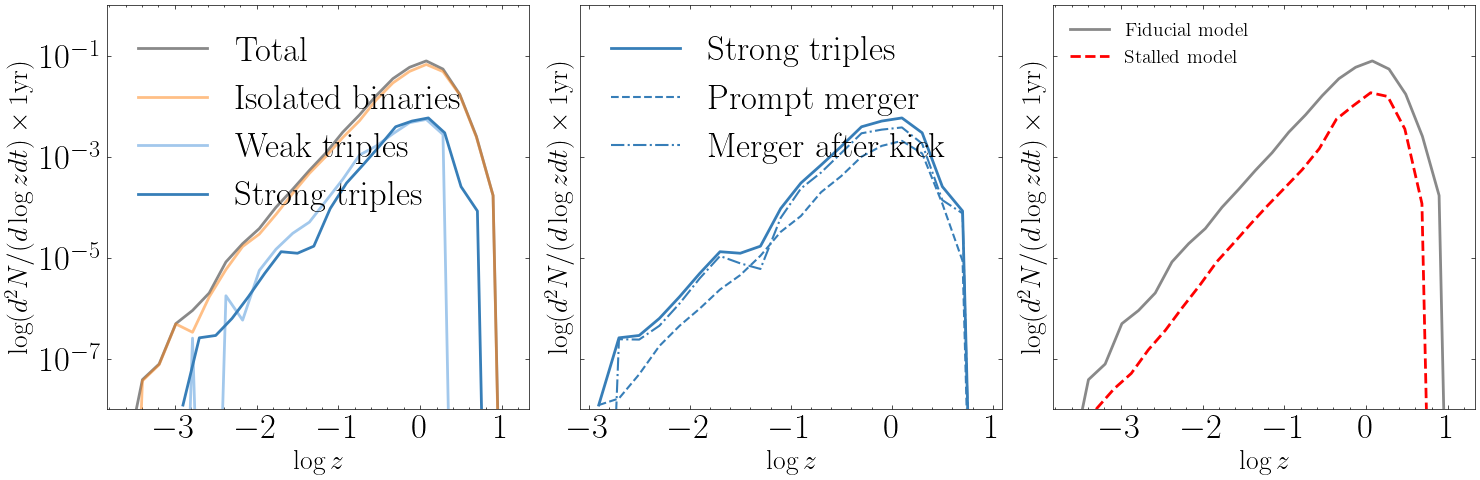

In [14]:
util.set_plot_style(linewidth=3,labelsize=30,legendsize=25,ticksize=25)
fig,axes = Tr.plot_merger_rates(strong_tr,weak_tr,iso_bin,stalled_objs,Nruns,merger_rate_path)
#change the fontsize of the legend


In [ ]:
fig.set_size_inches(17,6)
axes[0].legend(fontsize=20,loc='upper left')
axes[1].legend(fontsize=20,loc='upper left')
axes[2].legend(fontsize=20,loc='upper left')
#change the fontsize of the x and y labels
axes[0].set_xlabel(r'$\log z$',fontsize=30)
axes[1].set_xlabel(r'$\log z$',fontsize=30)
axes[2].set_xlabel(r'$\log z$',fontsize=30)

axes[0].set_ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=30)
axes[1].set_ylabel("")
axes[2].set_ylabel("")


axes[1].set_title("Strong triples",fontsize=30)
axes[0].set_title("Triples + Binaries",fontsize=30)
axes[2].set_title("Stalled + Fiducial",fontsize=30)
fig.tight_layout()

fig.savefig(f"../Figures/Merger_rate_w_stalled_N_{Nruns:d}.pdf")

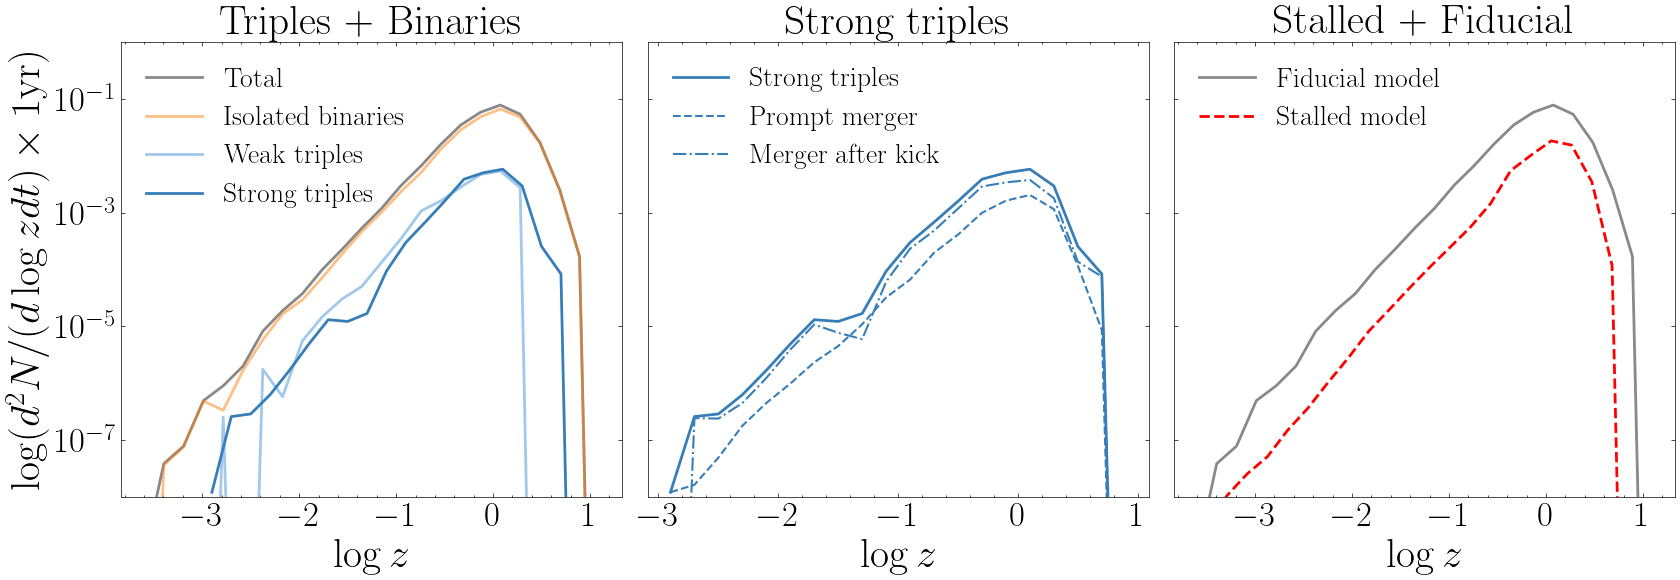

In [37]:
fig

### Massive Major merger population

In [38]:
iso_masssive_mask =  ((iso_bin.M1+iso_bin.M2)>1e8)&(iso_bin.qin>=0.1)&(iso_bin.merger_mask)
iso_massive_merger_rate,iso_massive_cum_merger_rate = mr.merger_rate_find(iso_bin.z_merger[iso_masssive_mask],zbinsize=0.2, zmax=7)
lgz_iso,dndlogz_iso_massive = mr.diff_merger_rate(iso_bin.z_merger[iso_masssive_mask],lgzbinsize=0.15,lgzmin=-3,lgzmax=1.0)
print(f"The merger rate of massive major mergers in isolated binaries is {iso_massive_merger_rate:.4f} yr^-1")
print(f"{np.sum(iso_masssive_mask)/iso_bin.N_iso_binaries * 100:.1f} % of isolated binaries are massive major mergers")

The merger rate of massive major mergers in isolated binaries is 0.0121 yr^-1
6.7 % of isolated binaries are massive major mergers


In [40]:
weak_tr_massive_mask = ((weak_tr.M1+weak_tr.M2)>1e8)&(weak_tr.qin>=0.1)&(weak_tr.merger_mask)
weak_tr_massive_merger_rate,weak_tr_massive_cum_erger_rate = mr.merger_rate_find(weak_tr.z_merger[weak_tr_massive_mask],zbinsize=0.2, zmax=7)
lgz_weak,dndlogz_weak_massive = mr.diff_merger_rate(weak_tr.z_merger[weak_tr.merger_mask],lgzbinsize=0.25,lgzmin=-3,lgzmax=1.0)
print(f"The merger rate of massive major mergers in weak triple inner binaries is {weak_tr_massive_merger_rate:.4f} yr^-1")
print(f"{np.sum(weak_tr_massive_mask)/weak_tr.N_weak_triples * 100:.1f} % of weak triples are massive major mergers")

The merger rate of massive major mergers in weak triple inner binaries is 0.0026 yr^-1
8.6 % of weak triples are massive major mergers


In [41]:
strong_tr_massive_merger_rates = []
strong_tr_massive_Ns = []
dNdlogzdt_strong_massive = []

for i in range(Nruns):
    strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
    strong_tr_massive_Ns.append(np.sum(strong_triple_massive_mask))
    strong_tr_massive_merger_rates.append(mr.merger_rate_find(strong_tr[i].z_triple_merger[strong_triple_massive_mask],zbinsize=0.2, zmax=7))
    lgzbins_strong,dNdlogzdt_strong_tmp =mr.diff_merger_rate(strong_tr[i].z_triple_merger[strong_triple_massive_mask],lgzbinsize=0.2,lgzmin=-3,lgzmax=1.0)
    dNdlogzdt_strong_massive.append(dNdlogzdt_strong_tmp)

print(f"{np.mean(strong_tr_massive_Ns)/520 * 100:.1f} % of strong triples are massive major mergers")
print(f"The strong triple merger rate is {np.mean(strong_tr_massive_merger_rates,axis=0)[0]:.4f} yr^-1")

24.5 % of strong triples are massive major mergers
The strong triple merger rate is 0.0034 yr^-1


In [42]:
massive_total_merger_rate = iso_massive_merger_rate+weak_tr_massive_merger_rate+np.mean(strong_tr_massive_merger_rates,axis=0)[0]
print(f"Total merger rate in the massive major mergers is {massive_total_merger_rate:.4f} yr^-1")
print(f"Iso mergers :{iso_massive_merger_rate/massive_total_merger_rate*100:.1f}%")
print(f"weak triple mergers :{weak_tr_massive_merger_rate/massive_total_merger_rate*100:.1f}%")
print(f"strong triple mergers:{np.mean(strong_tr_massive_merger_rates,axis=0)[0]/massive_total_merger_rate*100:.1f}%")

Total merger rate in the massive major mergers is 0.0181 yr^-1
Iso mergers :67.0%
weak triple mergers :14.1%
strong triple mergers:18.9%


In [43]:
binsize = 0.4
zmin = 0 # Your minimum z value
zmax =  4 # Your maximum z value
num_bins = int((zmax - zmin) / binsize)

z_strong=[]
z_strong_massive = []
z_total_massive=[]
z_total=[]


for i in range(Nruns):

    strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
    z_strong_massive.append(strong_tr[i].z_triple_merger[strong_triple_massive_mask])
    z_total_massive.append(np.concatenate([strong_tr[i].z_triple_merger[strong_triple_massive_mask],
                                                    iso_bin.z_merger[iso_masssive_mask]]))


    z_strong.append(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask])
    z_total.append(np.concatenate([strong_tr[i].z_triple_merger[strong_tr[i].merger_mask],
                                            iso_bin.z_merger[iso_bin.merger_mask]]))

In [45]:
i = 50

strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
z_strong_massive = strong_tr[i].z_triple_merger[strong_triple_massive_mask]
z_total_massive = np.concatenate([strong_tr[i].z_triple_merger[strong_triple_massive_mask],
                                                  iso_bin.z_merger[iso_masssive_mask]])


z_strong = strong_tr[i].z_triple_merger[strong_tr[i].merger_mask]
z_total = np.concatenate([strong_tr[i].z_triple_merger[strong_tr[i].merger_mask],
                                          iso_bin.z_merger[iso_bin.merger_mask]])

In [46]:
binsize = 0.4
zmin = 0 # Your minimum z value
zmax =  np.max(z_strong) # Your maximum z value
num_bins = int((zmax - zmin) / binsize)


total_bin_counts, bin_edges = np.histogram(z_total_massive, bins=num_bins, range=(zmin, zmax))
strong_bin_counts, _ = np.histogram(z_strong_massive, bins=num_bins, range=(zmin, zmax))
non_zero_mask = total_bin_counts > 0
fraction_strong_massive = np.zeros_like(total_bin_counts, dtype=float)
fraction_strong_massive[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]


total_bin_counts, bin_edges = np.histogram(z_total, bins=num_bins, range=(zmin, zmax))
strong_bin_counts, _ = np.histogram(z_strong, bins=num_bins, range=(zmin, zmax))
non_zero_mask = total_bin_counts > 0
fraction_strong = np.zeros_like(total_bin_counts, dtype=float)
fraction_strong[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]

In [47]:
massive_color_palette = {"all":"#009E73","strong":"#D55E00"}

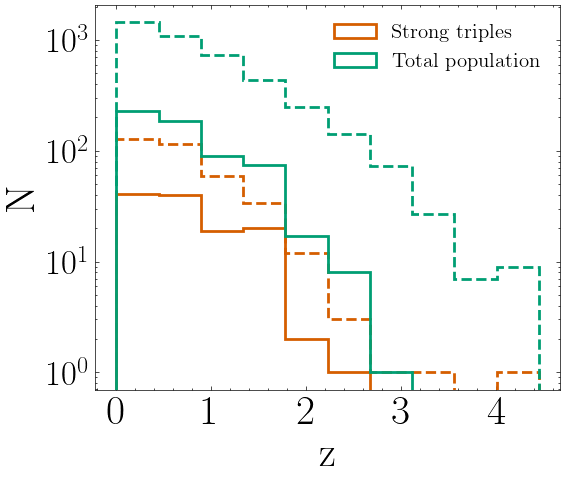

In [56]:
plt.figure(figsize=(6,5))
plt.hist(z_strong,bins=10, range=(0,zmax),histtype="step",color=massive_color_palette["strong"],linestyle="--",linewidth=2)
plt.hist(z_total,bins=10, range=(0,zmax),histtype="step",color=massive_color_palette["all"],linestyle="--",linewidth=2)

plt.hist(z_strong_massive,bins=10, range=(0,zmax),color=massive_color_palette["strong"],histtype="step",label="Strong triples",linewidth=2)
plt.hist(z_total_massive,bins=10, range=(0,zmax),color=massive_color_palette["all"],histtype="step",label="Total population",linewidth=2)
plt.xlabel("z",fontsize=30)
plt.ylabel("N")
plt.yscale("log")
plt.xticks([0,1,2,3,4],fontsize=30)
plt.legend(fontsize=15)
plt.savefig("../Figures/strong_triple_massive_major_mergers_N.pdf")

In [186]:
def optimized_fixed_bins_fraction(logz_strong, logz_total, lgzmin, lgzmax, initial_binsize, min_mergers):
    """
    Finds an optimized bin size such that each bin has at least min_mergers 
    and computes the fraction of strong mergers (N_strong / N_total) for each bin.
    The bin size is consistent across the entire range, except for the first bin, 
    which can have fewer than min_mergers.
    """
    optimized_binsize = initial_binsize
    
    # Initialize the binning with the starting bin size
    while True:
        bins = np.arange(lgzmin - optimized_binsize, lgzmax + optimized_binsize, optimized_binsize)
        total_bin_counts, bin_edges = np.histogram(logz_total, bins=bins)
        strong_bin_counts, _ = np.histogram(logz_strong, bins=bin_edges)
        
        # Allow the first bin to have less than the minimum mergers
        if np.all(total_bin_counts[1:] >= min_mergers):  # Only check bins after the first
            break  # The bin size is adequate, so we stop
        else:
            optimized_binsize *= 1.1  # Increase the bin size slightly

    # Compute the fraction of strong mergers
    fraction_strong = np.zeros_like(total_bin_counts, dtype=float)
    non_zero_mask = total_bin_counts > 0
    fraction_strong[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]
    
    # Calculate bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, fraction_strong, bin_edges, optimized_binsize


In [187]:
min_z = []
for i in range(Nruns):
    min_z.append([i,np.min(np.log10(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask]))])
min_z = np.array(min_z)

In [188]:
min_run = np.argmin(min_z[:,1])
print(min_run,np.min(min_z[:,1]))

76 -4.436046208350423


In [189]:
# Set parameters
#min_mergers = 5  # Minimum mergers per bin
lgzmin = -4      # Minimum log10 redshift
lgzmax = 1       # Maximum log10 redshift
initial_binsize = 0.01  # Initial bin size

# Accumulators for averaged results
accumulated_fraction_strong = []
accumulated_fraction_strong_massive = []
#final_bin_edges = None

i = min_run

strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
logz_strong_massive = np.log10(strong_tr[i].z_triple_merger[strong_triple_massive_mask])
logz_total_massive = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_triple_massive_mask],
                                                  iso_bin.z_merger[iso_masssive_mask]]))
    
lgzbins_massive, fraction_strong_massive, final_bin_edges_massive, optimized_binsize_massive = optimized_fixed_bins_fraction(
logz_strong_massive, logz_total_massive, lgzmin, lgzmax, initial_binsize=0.01, min_mergers=1)


logz_strong = np.log10(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask])
logz_total = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_tr[i].merger_mask],
                                          iso_bin.z_merger[iso_bin.merger_mask]]))

    # Apply the optimized fixed bins function for all mergers
lgzbins, fraction_strong, final_bin_edges, optimized_binsize = optimized_fixed_bins_fraction(
        logz_strong, logz_total, lgzmin, lgzmax, initial_binsize=0.01, min_mergers=10)

print(optimized_binsize,optimized_binsize_massive)
optimized_binsize = optimized_binsize-0.5

for i in range(Nruns):
    #bins = np.arange(lgzmin - optimized_binsize, lgzmax + optimized_binsize, optimized_binsize)
    strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
    logz_strong_massive = np.log10(strong_tr[i].z_triple_merger[strong_triple_massive_mask])
    logz_total_massive = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_triple_massive_mask],
                                                  iso_bin.z_merger[iso_masssive_mask]]))
    total_bin_counts, bin_edges = np.histogram(logz_total_massive, bins=final_bin_edges_massive)
    strong_bin_counts, _ = np.histogram(logz_strong_massive, bins=final_bin_edges_massive)

    fraction_strong_massive = np.zeros_like(total_bin_counts, dtype=float)
    non_zero_mask = total_bin_counts > 0
    fraction_strong_massive[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]
    accumulated_fraction_strong_massive.append(fraction_strong_massive)

    logz_strong = np.log10(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask])
    logz_total = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_tr[i].merger_mask],
                                          iso_bin.z_merger[iso_bin.merger_mask]]))
    
    total_bin_counts, bin_edges = np.histogram(logz_total, bins=final_bin_edges)
    strong_bin_counts, _ = np.histogram(logz_strong, bins=final_bin_edges)
    
    
    fraction_strong = np.zeros_like(total_bin_counts, dtype=float)
    non_zero_mask = total_bin_counts > 0
    fraction_strong[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]
    accumulated_fraction_strong.append(fraction_strong)


1.4204293198443187 1.2912993816766534


In [190]:
massive_color_palette = {"all":"#009E73","strong":"#D55E00"}

In [191]:
strong_fraction = np.mean(accumulated_fraction_strong,axis=0)
strong_fraction_massive = np.mean(accumulated_fraction_strong_massive,axis=0)

In [163]:
strong_fraction[strong_fraction<=0.02] = 0
strong_fraction_massive[strong_fraction_massive<=0.02] = 0

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(final_bin_edges[:-1], strong_fraction, marker="o", linestyle="--", markersize=10, color=massive_color_palette['all'], linewidth=2.5, label='All mergers')
plt.plot(final_bin_edges_massive[:-1],strong_fraction_massive, marker="o", linestyle="--", markersize=10,color=massive_color_palette['strong'], linewidth=2.5, label='Massive, major mergers')

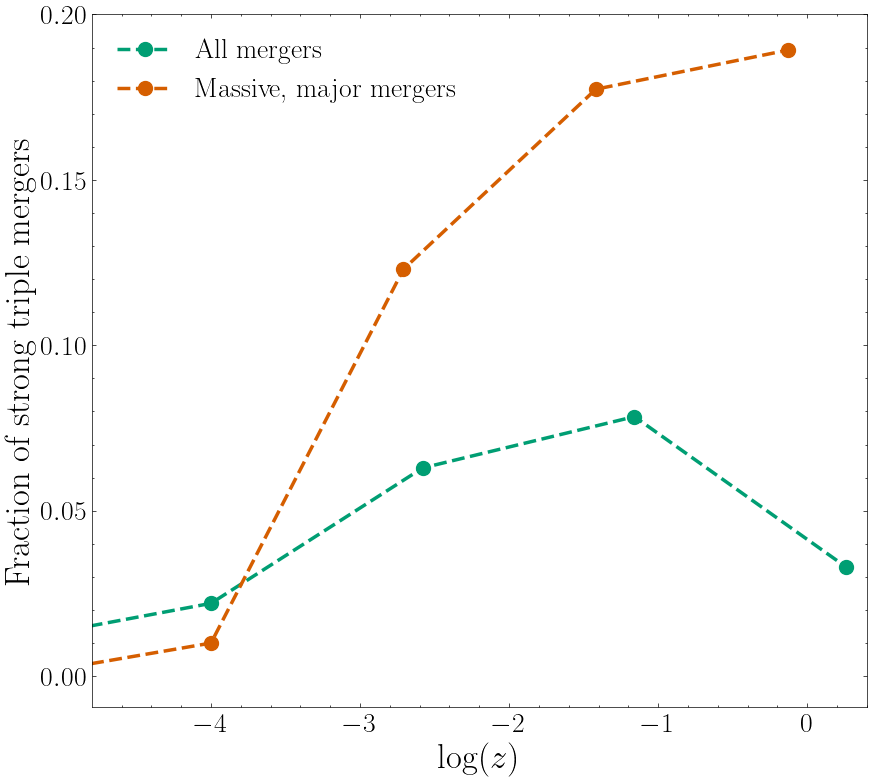

In [203]:
plt.figure(figsize=(10,9))
plt.plot(final_bin_edges[:-1], strong_fraction, marker="o", linestyle="--", markersize=10, color=massive_color_palette['all'], linewidth=2.5, label='All mergers')
plt.plot(final_bin_edges_massive[:-1],strong_fraction_massive, marker="o", linestyle="--", markersize=10,color=massive_color_palette['strong'], linewidth=2.5, label='Massive, major mergers')
plt.xlabel('$\log(z)$',fontsize=25)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.xlim(-4.8,0.4)
plt.ylabel('Fraction of strong triple mergers',fontsize=25)
plt.legend(loc="upper left")
plt.savefig("../Figures/fraction_of_strong_triples_massive_vs_all.pdf")

### Making it linear z scale

In [ ]:
strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask



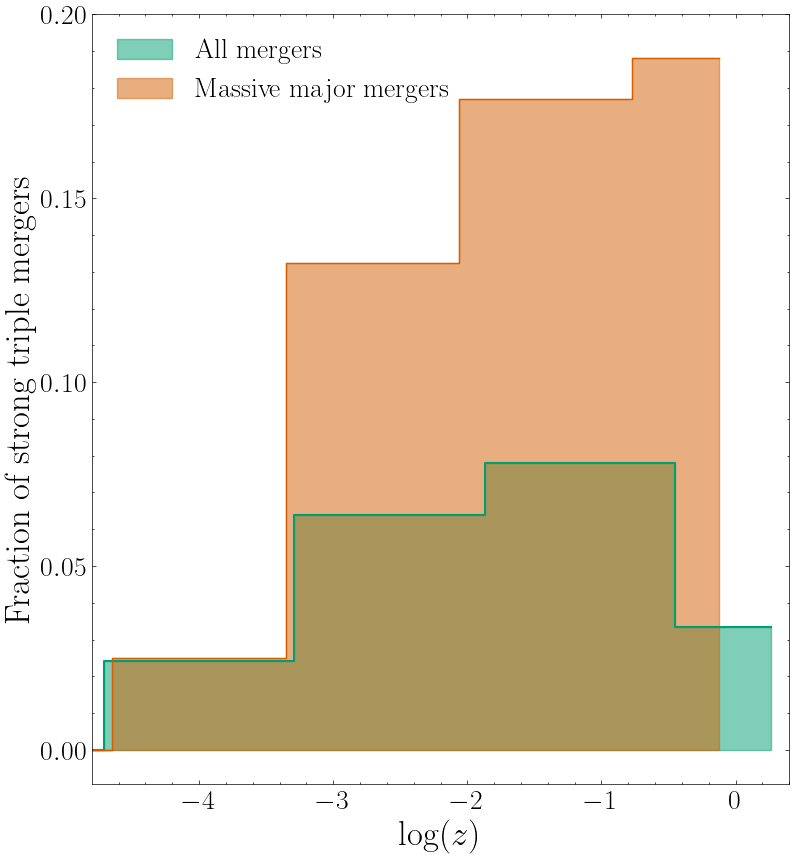

In [145]:
plt.figure(figsize=(9,10))
plt.step(final_bin_edges[:-1],strong_fraction,where="mid",color=massive_color_palette['all'],linewidth=1.5)
plt.fill_between(final_bin_edges[:-1], 
                 strong_fraction, 
                 step="mid", alpha=0.5, color=massive_color_palette['all'], label='All mergers')
plt.step(final_bin_edges_massive[:-1],strong_fraction_massive,where="mid",color=massive_color_palette['strong'])
plt.fill_between(final_bin_edges_massive[:-1], 
                 strong_fraction_massive, 
                 step="mid", alpha=0.5, color=massive_color_palette['strong'], label='Massive major mergers')

plt.xlabel('$\log(z)$',fontsize=25)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.xlim(-4.8,0.4)
plt.ylabel('Fraction of strong triple mergers',fontsize=25)
plt.legend(loc="upper left")
plt.savefig("../Figures/fraction_of_strong_triples_massive_vs_all_dist.pdf")

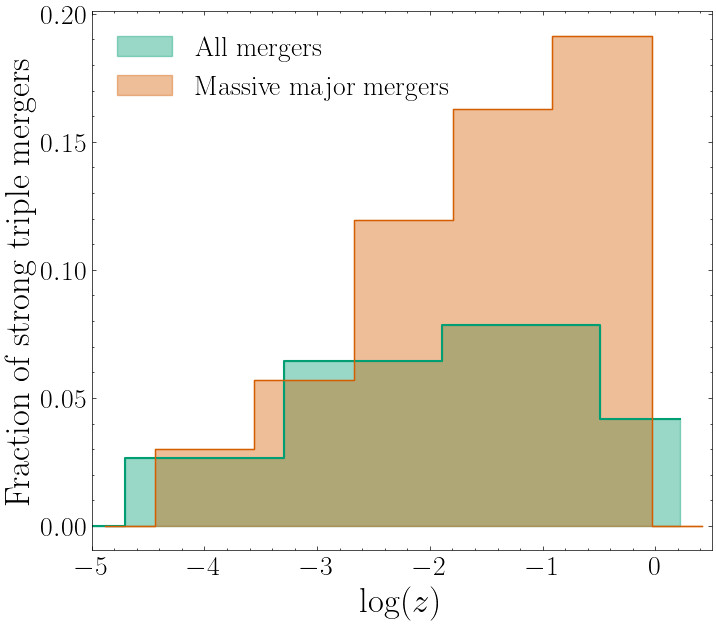

In [67]:
plt.figure(figsize=(8,7))
plt.step(final_bin_edges[:-1],strong_fraction,where="mid",color=massive_color_palette['all'],linewidth=1.5)
plt.fill_between(final_bin_edges[:-1], 
                 strong_fraction, 
                 step="mid", alpha=0.4, color=massive_color_palette['all'], label='All mergers')
plt.step(final_bin_edges_massive[:-1],strong_fraction_massive,where="mid",color=massive_color_palette['strong'])
plt.fill_between(final_bin_edges_massive[:-1], 
                 strong_fraction_massive, 
                 step="mid", alpha=0.4, color=massive_color_palette['strong'], label='Massive major mergers')

plt.xlabel('$\log(z)$',fontsize=25)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.xlim(-5,0.5)
plt.ylabel('Fraction of strong triple mergers',fontsize=25)
plt.legend(loc="upper left")
plt.savefig("../Figures/fraction_of_strong_triples_massive_vs_all_dist.pdf")